<a href="https://colab.research.google.com/github/barani-bhoopalan/fetch-rewards-data-assessment/blob/fetch-data-analysis-v1/Fetch_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FETCH ASSESSMENT**

## **A. DATA EXPLORATION**

Importing Libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [2]:
# Loading product, transaction, and user datasets from CSV files into Pandas DataFrames
prod_df = pd.read_csv("PRODUCTS_TAKEHOME.csv")  # Load product data
trans_df = pd.read_csv("TRANSACTION_TAKEHOME.csv")  # Load transaction data
user_df = pd.read_csv("USER_TAKEHOME.csv")  # Load user data

Data Overview

In [3]:
# Display the first few rows of each DataFrame
print(prod_df.head())
print(trans_df.head())
print(user_df.head())

# Get the shape of each dataset (number of rows and columns)
print(prod_df.shape)
print(trans_df.shape)
print(user_df.shape)

# Get the column names for each DataFrame
print(prod_df.columns)
print(trans_df.columns)
print(user_df.columns)

# Check the data types of each column in the DataFrames
print(prod_df.dtypes)
print(trans_df.dtypes)
print(user_df.dtypes)

          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELECSOP  4.618178e

Data Quality Check

In [4]:
# Check for missing values in each DataFrame
print(prod_df.isnull().sum())
print(trans_df.isnull().sum())
print(user_df.isnull().sum())

# Check for duplicate rows in each DataFrame
print(prod_df.duplicated().sum())
print(trans_df.duplicated().sum())
print(user_df.duplicated().sum())

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
215
171
0


## **B. DATA PREPROCESSING**

Data Preprocessing – Create 'AGE' field and remove records with AGE > 100

In [5]:
# Get the total number of rows in the user DataFrame
user_totrows = len(user_df)

# Create a summary DataFrame with column-wise null and non-null counts for the "BIRTH_DATE" column in the user DataFrame
null_summary_birthdate = pd.DataFrame({
    'DataFrame': ['user_df'],
    'Total': [user_totrows],
    'NULL Count': [user_df['BIRTH_DATE'].isnull().sum()],
    'NOT NULL Count': [user_df['BIRTH_DATE'].notnull().sum()],
    '% of NULL': [round((user_df['BIRTH_DATE'].isnull().sum() / user_totrows) * 100, 2)]
})

print(null_summary_birthdate)

# Ensure the "BIRTH_DATE" column is in datetime format
user_df['BIRTH_DATE'] = pd.to_datetime(user_df['BIRTH_DATE'], errors='coerce')

# Remove the timezone from the "BIRTH_DATE" column if present
user_df['BIRTH_DATE'] = user_df['BIRTH_DATE'].dt.tz_localize(None)

# Ensure 'today' is timezone-free
today = pd.to_datetime('today').normalize()

# Calculate the "AGE" based on "BIRTH_DATE", setting "AGE" to -1 if "BIRTH_DATE" is invalid
user_df['AGE'] = user_df['BIRTH_DATE'].apply(
    lambda x: (today - x).days // 365 if pd.notna(x) else -1)

# Print unique values in the "AGE" column
print(user_df['AGE'].unique())


  DataFrame   Total  NULL Count  NOT NULL Count  % of NULL
0   user_df  100000        3675           96325       3.68
[ 24  23  30  -1  52  25  41  55  42  32  43  21  26  39  27  22  69  59
  63  33  38  66  45  37  18  47  68  49  54  28  19  35  20  70  57  46
  36  15  40  62  44  29  31  51  53  34  17  64  48  50  76  56  58  77
  82  74  75  60  73  86  16  67  78  65  14  61  72  95  83  79  71  85
  12  87  13  98  91  80  94 122  93  89  81 101  88 123  84 102   9  10
 120 119 106 124 105 118  11  92   4  96   8  90   6 113 107 104 103 116
 100   2 114 115  97   7 109 125 121  99   3 110 117]


In [6]:
# Filter rows where AGE is greater than 100
age_above_100 = user_df[user_df['AGE'] > 100]

# Print the count of rows where AGE > 100 and their percentage of the total dataset
print(f"There are {len(age_above_100)} rows with AGE > 100, which is {round(len(age_above_100) / len(user_df) * 100, 2)}% of the dataset.")

# Remove rows where AGE is greater than 100
user_df = user_df[user_df['AGE'] <= 100]


There are 61 rows with AGE > 100, which is 0.06% of the dataset.


Data Preprocessing – Adjust Data Types and Remove Duplicates

In [7]:
# Check if there is a dropdown to select stores and view unique values
# Print(trans_df['STORE_NAME'].unique())

# Change data type of "BARCODE" field to string (for both Product and Transaction datasets) to avoid scientific notation
prod_df['BARCODE'] = prod_df['BARCODE'].astype(str)
trans_df['BARCODE'] = trans_df['BARCODE'].astype(str)

# For consistency, convert date fields to datetime format in both Transaction and User datasets
trans_df['PURCHASE_DATE'] = pd.to_datetime(trans_df['PURCHASE_DATE']).dt.date
trans_df['SCAN_DATE'] = pd.to_datetime(trans_df['SCAN_DATE']).dt.date
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE']).dt.date
user_df['BIRTH_DATE'] = pd.to_datetime(user_df['BIRTH_DATE']).dt.date

# Remove redundant records from both the Transaction (215 records) and User (171 records) datasets
trans_df = trans_df.drop_duplicates()
user_df = user_df.drop_duplicates()


Data Preprocessing – Remove Records with Scan Date Earlier than Purchase Date

In [8]:
# Confirm that receipts are scanned for rewards only after the purchase
# Print the count of records where SCAN_DATE is earlier than PURCHASE_DATE
print((trans_df['SCAN_DATE'] < trans_df['PURCHASE_DATE']).sum())

# Filter out records where SCAN_DATE is earlier than PURCHASE_DATE
trans_df = trans_df[trans_df['SCAN_DATE'] >= trans_df['PURCHASE_DATE']]

94


Data Preprocessing – Verifying Missing BARCODE Records

In [9]:
# Get the total number of rows for product and transaction DataFrames
prod_totrows = len(prod_df)
trans_totrows = len(trans_df)

# Create a DataFrame with column-wise null and non-null counts for the "BARCODE" column in both product and transaction datasets
null_summary = pd.DataFrame({
    'DataFrame': ['prod_df', 'trans_df'],
    'Total': [prod_totrows, trans_totrows],
    'NULL Count': [prod_df['BARCODE'].isnull().sum(), trans_df['BARCODE'].isnull().sum()],
    'NOT NULL Count': [prod_df['BARCODE'].notnull().sum(), trans_df['BARCODE'].notnull().sum()],
    '% of NULL': [round((prod_df['BARCODE'].isnull().sum() / prod_totrows) * 100, 2),
                  round((trans_df['BARCODE'].isnull().sum() / trans_totrows) * 100, 2)]
})

# Print the summary of null counts for BARCODE
print(null_summary)


  DataFrame   Total  NULL Count  NOT NULL Count  % of NULL
0   prod_df  845552           0          845552        0.0
1  trans_df   49735           0           49735        0.0


Data Preprocessing – Standardizing Gender field

In [10]:
# Create a function to standardize the 'GENDER' field in the User dataset
def gender_standardize(value):
    if pd.isna(value) or value == '':
        return 'UNKNOWN'

    value = str(value).lower()
    if value in ['m', 'male']:
        return 'MALE'
    elif value in ['f', 'female']:
        return 'FEMALE'
    else:
        return 'OTHER'

# Apply the function to standardize the 'GENDER' field in the User dataset
user_df['GENDER'] = user_df['GENDER'].apply(gender_standardize)

# Print the unique values in the 'GENDER' field
# Print(user_df['GENDER'].unique())

# Check the number of missing values in the 'GENDER' field
# Print(user_df['GENDER'].isnull().sum())


Data Preprocessing – Standardizing State field

In [11]:
# Create a function to standardize the 'STATE' field in the User dataset
def state_standardize(value):
    if pd.isna(value) or value == '':
        return 'UNKNOWN'
    else:
        return value

# Apply the function to standardize the 'STATE' field in the User dataset
user_df['STATE'] = user_df['STATE'].apply(state_standardize)

# Print the unique values in the 'STATE' field
print(user_df['STATE'].unique())

# Check the number of missing values in the 'STATE' field
print(user_df['STATE'].isnull().sum())


['CA' 'PA' 'FL' 'NC' 'NY' 'IN' 'UNKNOWN' 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ'
 'RI' 'MO' 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC'
 'MN' 'WV' 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE'
 'NV' 'AL' 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']
0


Data Preprocessing – Convert Non-Numeric Values in FINAL_QUANTITY to 0

In [12]:
# Convert 'FINAL_QUANTITY' and 'FINAL_SALE' to numeric, handling non-numeric and empty values
trans_df['FINAL_QUANTITY'] = round(pd.to_numeric(trans_df['FINAL_QUANTITY'], errors='coerce'), 2)
trans_df['FINAL_SALE'] = round(pd.to_numeric(trans_df['FINAL_SALE'], errors='coerce'), 2)

# Replace NaN values (previously non-numeric) with 0
trans_df['FINAL_QUANTITY'] = trans_df['FINAL_QUANTITY'].fillna(0)
trans_df['FINAL_SALE'] = trans_df['FINAL_SALE'].fillna(0)

# Verify the unique values in 'FINAL_QUANTITY' and 'FINAL_SALE'
#print(trans_df['FINAL_QUANTITY'].unique())
#print(trans_df['FINAL_SALE'].unique())


## **C. SQL Questions**

**1. What are the top 5 brands by receipts scanned among users 21 and over?**

  SQL - This Query helps identify the most popular brands among the users based on actual purchase data.
  Query starts by counting how many times each brand appears in the transaction data. It then ranks the brands using DENSE_RANK.
  Finally, it filters the results to show only the top 5 brands with the highest receipt counts.

        WITH CTE AS (
          SELECT
              p.BRAND,
              COUNT(t.RECEIPT_ID) AS receipt_count,
              DENSE_RANK() OVER (ORDER BY COUNT(t.RECEIPT_ID) DESC) AS rank
          FROM TRANSACTION_TAKEHOME t
          JOIN PRODUCTS_TAKEHOME p ON t.BARCODE = p.BARCODE
          JOIN USER_TAKEHOME u ON t.USER_ID = u.ID
          WHERE u.AGE >= 21
          GROUP BY p.BRAND
        )
        SELECT BRAND, receipt_count, rank
        FROM CTE
        WHERE rank <= 5;




In [13]:
# Merge datasets
merged_df = (trans_df
             .merge(prod_df, on='BARCODE', how='inner')
             .merge(user_df, left_on='USER_ID', right_on='ID', how='inner'))

# Filter users aged 21 and above
filtered_df = merged_df[merged_df['AGE'] >= 21]

# Count purchases per brand
brand_counts = filtered_df.groupby('BRAND')['RECEIPT_ID'].count().reset_index()

# Rename columns
brand_counts.columns = ['BRAND', 'RECEIPT_COUNT']

# Rank brands using dense rank
brand_counts['RANK'] = brand_counts['RECEIPT_COUNT'].rank(method='dense', ascending=False)

# Get top 5 brands
top_5_brands = brand_counts[brand_counts['RANK'] <= 5].sort_values(by='RANK').reset_index(drop=True)

print(top_5_brands)

                       BRAND  RECEIPT_COUNT  RANK
0                  COCA-COLA            602   1.0
1  ANNIE'S HOMEGROWN GROCERY            552   2.0
2                       DOVE            535   3.0
3                   BAREFOOT            529   4.0
4                      ORIBE            483   5.0


**2. What are the top 5 brands by sales among users who have had their accounts for at least six months?**

  SQL - This query identifies the top 5 brands by total sales for users who have had their accounts for at least six months. It calculates the total sales for each brand and ranks them based on the total sales amount.

        WITH USER_CTE AS (
          SELECT ID
          FROM user_takehome
          WHERE CREATED_DATE <= DATEADD(MONTH, -6, GETDATE())
        ),
        SALES_CTE AS (
            SELECT
                p.BRAND,
                SUM(t.FINAL_SALE) AS total_Sales,
                DENSE_RANK() OVER (ORDER BY SUM(t.FINAL_SALE) DESC) AS rank
            FROM transaction_takehome t
            JOIN products_takehome p ON t.BARCODE = p.BARCODE
            JOIN USER_CTE u ON t.USER_ID = u.ID
            GROUP BY p.BRAND
        )
        SELECT BRAND, total_Sales
        FROM SALES_CTE
        WHERE rank <= 5;




In [14]:
from dateutil.relativedelta import relativedelta
#extract exact date 6 months prior
six_months_prior = datetime.now() - relativedelta(months=6)
# Convert to datetime.datetime
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'])

#filter the dataset to include only records available for over 6 months
user_cte_df = user_df[user_df['CREATED_DATE'] <= six_months_prior]

# SALES_CTE
sales_cte_df1 = trans_df.merge(prod_df, left_on='BARCODE', right_on='BARCODE') \
                                   .merge(user_cte_df, left_on='USER_ID', right_on='ID') \
                                   .groupby('BRAND')['FINAL_SALE'].sum().reset_index()

sales_cte_df1 = sales_cte_df1.sort_values(by='FINAL_SALE', ascending=False)
sales_cte_df1['rank'] = sales_cte_df1['FINAL_SALE'].rank(method='dense', ascending=False)
sales_cte_df1 = sales_cte_df1.rename(columns={'FINAL_SALE': 'total_Sales'})


# Result set
final_df1 = sales_cte_df1[sales_cte_df1['rank'] <= 5][['BRAND', 'total_Sales']].reset_index(drop=True)

print(final_df1)

user_df['CREATED_DATE'] = user_df['CREATED_DATE'].dt.date

                       BRAND  total_Sales
0                  COCA-COLA      2523.98
1  ANNIE'S HOMEGROWN GROCERY      2321.04
2                       DOVE      2267.21
3                   BAREFOOT      2224.33
4                      ORIBE      2030.91


**3. Which is the leading brand in the Dips & Salsa category by total sales?**

  SQL - This query identifies the leading brand in the Dips & Salsa category based on total sales. It calculates the total sales for each brand within this category and ranks them accordingly.

        WITH SALES_CTE AS (
            SELECT
                p.BRAND,
                SUM(t.FINAL_SALE) AS total_Sales,
                DENSE_RANK() OVER (ORDER BY SUM(t.FINAL_SALE) DESC) AS rank
            FROM transaction_takehome t
            JOIN products_takehome p ON t.BARCODE = p.BARCODE
            JOIN user_takehome u ON t.USER_ID = u.ID
            where p.CATEGORY_2 = 'Dips & Salsa'
            GROUP BY p.BRAND
        )
        SELECT BRAND, total_Sales
        FROM SALES_CTE
        WHERE rank <= 5;

In [15]:
# SALES_CTE
sales_cte_df2 = trans_df.merge(prod_df, left_on='BARCODE', right_on='BARCODE') \
    .merge(user_df, left_on='USER_ID', right_on='ID')

# Filter for 'Dips & Salsa' category
sales_cte_df2 = sales_cte_df2[sales_cte_df2['CATEGORY_2'] == 'Dips & Salsa']

sales_cte_df2 = sales_cte_df2.groupby('BRAND')['FINAL_SALE'].sum().reset_index()

sales_cte_df2 = sales_cte_df2.sort_values(by='FINAL_SALE', ascending=False)
sales_cte_df2['rank'] = sales_cte_df2['FINAL_SALE'].rank(method='dense', ascending=False)
sales_cte_df2 = sales_cte_df2.rename(columns={'FINAL_SALE': 'total_Sales'})

# Final result set
final_df2 = sales_cte_df2[sales_cte_df2['rank'] <= 5][['BRAND', 'total_Sales']].reset_index(drop=True)

print(final_df2)

                           BRAND  total_Sales
0                       TOSTITOS       483.55
1                 FRESH CRAVINGS       386.84
2                    OLD EL PASO       386.84
3                         FRITOS       386.84
4                         HERDEZ       290.13
5                        MISSION       290.13
6                      LITEHOUSE       290.13
7                        ATHENOS       290.13
8                     GOOD FOODS       290.13
9           GARDEN FRESH GOURMET       290.13
10                        WHOLLY       290.13
11                         DAISY       290.13
12                   BOAR'S HEAD       290.13
13                      MARZETTI       199.41
14        FOOD SHOULD TASTE GOOD       193.42
15                     CHI-CHI'S       193.42
16                      VELVEETA       193.42
17             BAKER'S CHOCOLATE       193.42
18                      SABRITAS       193.42
19                       RUFFLES       193.42
20                      PANCHO'S  

**4. What is the percentage of sales in the Health & Wellness category by generation?**

  SQL - The query calculates the percentage of total sales for each generation within the Health & Wellness category

          WITH USER_CTE AS (
          SELECT
          u.ID,
          CASE
              WHEN year(u.BIRTH_DATE) BETWEEN 1946 AND 1964 THEN 'Baby Boomers'
              WHEN year(u.BIRTH_DATE) BETWEEN 1965 AND 1980 THEN 'Generation X'
              WHEN year(u.BIRTH_DATE) BETWEEN 1981 AND 1996 THEN 'Millennials'
              WHEN year(u.BIRTH_DATE) BETWEEN 1997 AND 2012 THEN 'Generation Z'
              WHEN year(u.BIRTH_DATE)>= 2013 THEN 'Generation Z'
              ELSE 'Unknown'
          END AS GENERATION
          FROM user_takehome u
          ),
          SALES_CTE AS (
          SELECT
          u.GENERATION,
          SUM(t.FINAL_SALE) AS total_sales
          FROM transaction_takehome t
          JOIN products_takehome p ON t.BARCODE = p.BARCODE
          JOIN USER_CTE u ON t.USER_ID = u.ID
          WHERE p.CATEGORY_1 = 'Health & Wellness'
          GROUP BY u.GENERATION
          )
          SELECT
          GENERATION,
          total_sales,
          (total_sales / (SELECT SUM(total_sales) FROM SALES_CTE) * 100) AS sales_percentage
          FROM SALES_CTE;



In [16]:
# Create a generation column based on birth year (if not already available)
def get_generation(birth_year):
    if 1901 <= birth_year <= 1927:
        return 'The Greatest Generation'
    elif 1928 <= birth_year <= 1945:
        return 'The Silent Generation'
    elif 1946 <= birth_year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= birth_year <= 1980:
        return 'Generation X'
    elif 1981 <= birth_year <= 1996:
        return 'Millennials (Generation Y)'
    elif 1997 <= birth_year <= 2012:
        return 'Generation Z'
    elif birth_year >= 2013:
        return 'Gen Alpha'
    else:
        return 'Unknown'

# Convert to datetime.datetime
user_df['BIRTH_DATE'] = pd.to_datetime(user_df['BIRTH_DATE'])
user_df['BIRTH_YEAR'] = user_df['BIRTH_DATE'].dt.year
user_df['GENERATION'] = user_df['BIRTH_YEAR'].apply(get_generation)

# Merge datasets
merged_data = trans_df.merge(prod_df, on='BARCODE', how='inner') \
                      .merge(user_df[['ID', 'GENERATION']], left_on='USER_ID', right_on='ID', how='inner')

# Filter for Health & Wellness category (CATEGORY_1)
health_wellness_data = merged_data[merged_data['CATEGORY_1'] == 'Health & Wellness']

# Calculate the total sales in Health & Wellness category
sales_by_generation = health_wellness_data.groupby('GENERATION')['FINAL_SALE'].sum().reset_index()

# Calculate total sales per generation
total_sales = sales_by_generation['FINAL_SALE'].sum()

# Calculate the percentage of sales per generation
sales_by_generation['sales_percentage'] = (sales_by_generation['FINAL_SALE'] / total_sales) * 100

# Display the result
print(sales_by_generation[['GENERATION', 'sales_percentage']])
user_df['BIRTH_DATE'] = user_df['BIRTH_DATE'].dt.date

                   GENERATION  sales_percentage
0                Baby Boomers         27.976009
1                Generation X         24.772642
2  Millennials (Generation Y)         47.251349


## **D. Visualization**

 Top 5 Brands by Receipts Scanned Among Users 21 and Over

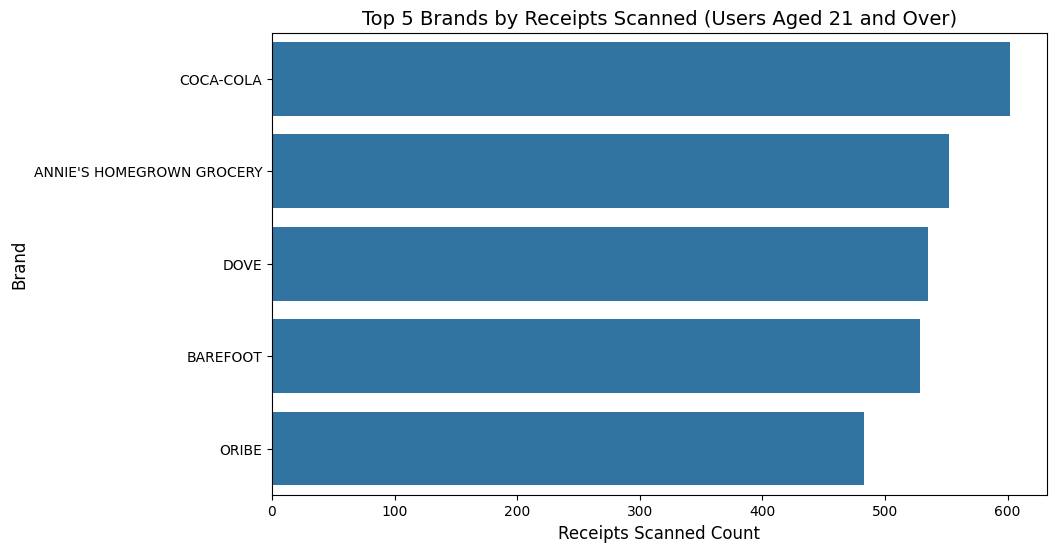

In [17]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the barplot
sns.barplot(x='RECEIPT_COUNT', y='BRAND', data=top_5_brands)

# Add titles and labels
plt.title('Top 5 Brands by Receipts Scanned (Users Aged 21 and Over)', fontsize=14)
plt.xlabel('Receipts Scanned Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)

# Show the plot
plt.show()

Top 5 Brands by Sales Among Users with Accounts Older Than Six Months

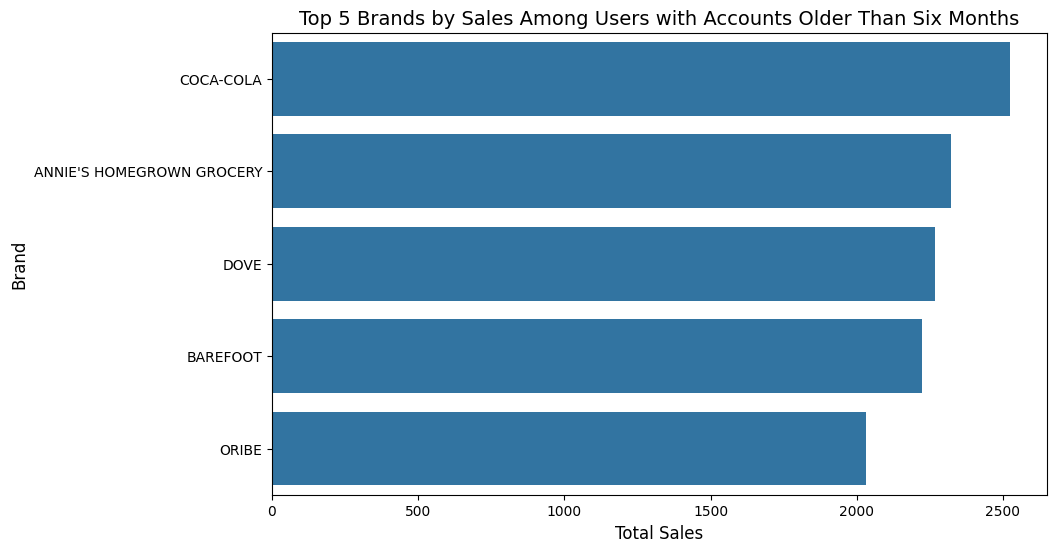

In [18]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the barplot
sns.barplot(x='total_Sales', y='BRAND', data=final_df1)

# Add titles and labels
plt.title('Top 5 Brands by Sales Among Users with Accounts Older Than Six Months', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Brand', fontsize=12)

# Show the plot
plt.show()

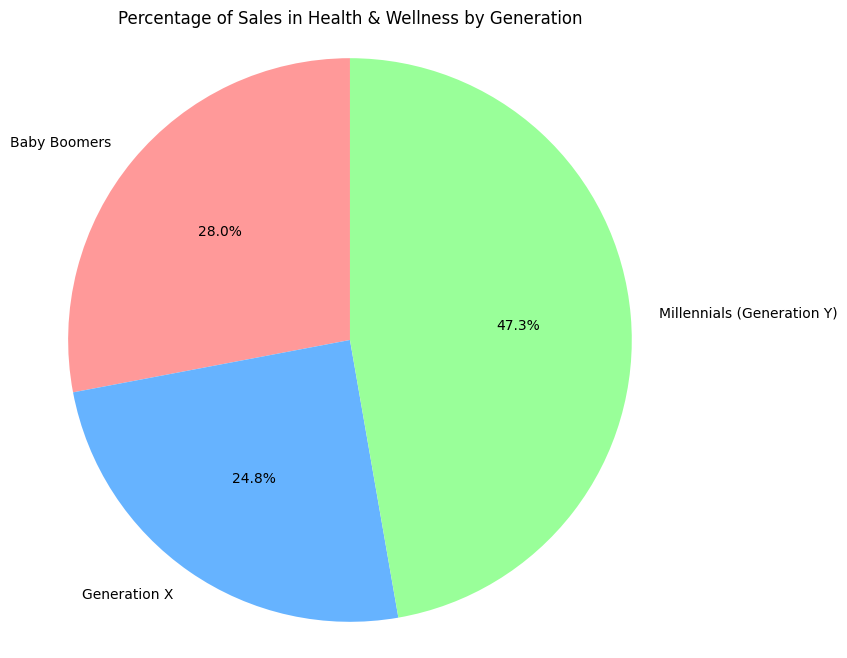

In [19]:
# Plot the pie chart for sales percentage by generation
plt.figure(figsize=(8, 8))
plt.pie(sales_by_generation['sales_percentage'],
        labels=sales_by_generation['GENERATION'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0','#ffb3b3'])  # Custom colors

# Set the title
plt.title('Percentage of Sales in Health & Wellness by Generation')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Receipts Scanned by Gender

<ipython-input-20-29cea7d0273b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENDER', y='Receipts Scanned', data=gender_receipt_counts, palette='pastel')


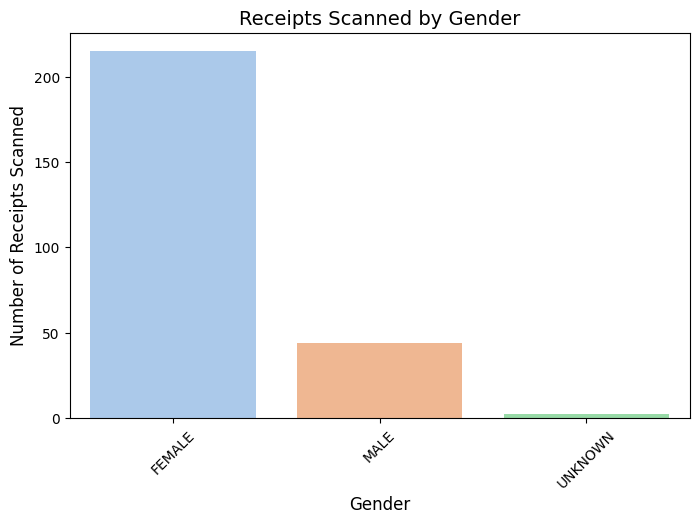

In [20]:
# Merge transaction dataset with user dataset to get gender information
trans_user_df = trans_df.merge(user_df[['ID', 'GENDER']], left_on='USER_ID', right_on='ID', how='left')

# Count the number of receipts per gender
gender_receipt_counts = trans_user_df['GENDER'].value_counts().reset_index()
gender_receipt_counts.columns = ['GENDER', 'Receipts Scanned']

# Plot the data using a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='GENDER', y='Receipts Scanned', data=gender_receipt_counts)

# Customize the plot
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Receipts Scanned', fontsize=12)
plt.title('Receipts Scanned by Gender', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed

# Show the plot
plt.show()

## **E. SUMMARY**



1. Are there any data quality issues present?

2. Are there any fields that are challenging to understand?

    * The BARCODE field was initially set as a float, which displayed in scientific notation, making it difficult to read. I converted it to a string format for better clarity.
    * There are 61 rows where the AGE is recorded as greater than 100, representing 0.06% of the dataset.
    * Date fields were standardized and converted to proper date formats to ensure consistency across the dataset.
    * Duplicate rows were removed from both the transaction and user datasets to maintain data integrity.
    * I identified 94 records where the scan date occurred before the receipt date, and these records were removed to correct the data.
    * There are instances where the FINAL_QUANTITY is 0 for certain sales, which may be affecting the sales calculations.



---







## **F. EMAIL**

**Subject: Data Quality and Insights based on FETCH data**

Hi,

I wanted to share some key findings from the recent data analysis and highlight a few points that might require your attention.

**Key Data Quality Issues:**
* **AGE > 100**: There are 61 rows where the AGE is recorded as greater than 100, representing 0.06% of the dataset. I’ve removed these records for now to ensure data accuracy, but further validation would be appreciated to confirm this approach.
* **BARCODE Field**: The BARCODE field was initially stored as a float, which led to issues with scientific notation and made it hard to read. I’ve converted it to a string format to improve clarity.
* **Date Standardization**: Several date fields were not in a consistent format. These have now been standardized to ensure that we have consistent, accurate data for analysis.
* **Duplicate Records**: Duplicate rows in both the transaction and user datasets were removed to maintain data integrity.
* **Scan Date vs. Receipt Date**: I identified 94 records where the scan date occurred before the receipt date, which I’ve removed to ensure the data is correct.Need your input to validate my assumption.
* **Zero Quantity Sales**: There are certain sales transactions where the FINAL_QUANTITY is recorded as 0, which could be affecting our sales figures. To better understand these transactions, is there any additional data or information available that could help us validate these entries? For example, are there any known circumstances (such as cancellations, returns, or errors during data entry) that could explain these zero quantities, or should we treat them as data anomalies to exclude from analysis?

**Interesting Trend:**
* **Top Brands by Sales**: One interesting trend I noticed is that COCA-COLA is leading in both receipt scans (602) and total sales ($2523.98) among the top brands. This suggests that Coca-Cola has strong visibility and demand in the dataset.We could take advantage of this by offering special promotions or rewards for Coca-Cola purchases. This could encourage more users to engage with the app and scan more receipts. Additionally, understanding which users buy Coca-Cola could help us personalize offers and boost loyalty.

**Action Request:**

To proceed further I would appreciate your input on the following:

* Could you confirm if there are any specific requirements for how sales with FINAL_QUANTITY = 0 should be handled?
* Would it be helpful to explore any additional data sources or account for any specific business rules that might affect the data, such as promotional sales or discounts?
* Your insights will help us resolve any remaining issues and ensure that the analysis is aligned with your team's needs.

Looking forward to your thoughts!

Best regards,

Barani